In [1]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
# Loading cifar10 images dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
# shape of train and test dataset
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [5]:
# 3rd elemant of x_train dataset
x_train[3]

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]

In [6]:
# shape of 3rd elemant of x_train dataset
x_train[3].shape

(32, 32, 3)

In [7]:
# creating function that will Visualizing dataset
def visualize_image(index):
  plt.figure(figsize=(10,1))
  plt.imshow(x_train[index])

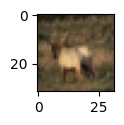

In [8]:
# visualizing 3rd elemant of x_train dataset
visualize_image(3)

In [9]:
# defining class labels
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [10]:
# 3rd elemant label of x_train dataset using y_train
y_train[3]

array([4], dtype=uint8)

In [11]:
# 3rd elemant naME of x_train dataset using y_train
class_labels[y_train[3][0]]

'deer'

In [12]:
# Normalizing the training and test dataset value from 0 to 1
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [13]:
# first element of x_train_scale dataset
x_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
# First 5 labels of x_train dataset
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
# One hot encoding for target labels
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [16]:
# First 5 one hot encodded labels of y_train_categorical dataset
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
# adding artificial neural network
model = keras.Sequential([
    # flattening the dataset
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    # adding 1000 hidden layers
    keras.layers.Dense(1000, activation="relu"),
    # adding 500 hidden layers
    keras.layers.Dense(500, activation="relu"),
    # adding final 10 output layers
    keras.layers.Dense(10, activation="sigmoid")
])

# compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# fitting the model
model.fit(x_train_scaled, y_train_categorical, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 86s 54ms/step - loss: 1.8637 - accuracy: 0.3284
Epoch 2/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6709 - accuracy: 0.3986
Epoch 3/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5878 - accuracy: 0.4289
Epoch 4/20
1563/1563 [==============================] - 70s 45ms/step - loss: 1.5392 - accuracy: 0.4491
Epoch 5/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5016 - accuracy: 0.4627
Epoch 6/20
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4697 - accuracy: 0.4741
Epoch 7/20
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4431 - accuracy: 0.4815
Epoch 8/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4199 - accuracy: 0.4899
Epoch 9/20
1563/1563 [==============================] - 71s 45ms/step - loss: 1.3968 - accuracy: 0.4986
Epoch 10/20
1563/1563 [==============================] - 70s 45m

In [18]:
# Evaluate the model
model.evaluate(x_test_scaled, y_test_categorical)

313/313 [==============================] - 4s 12ms/step - loss: 1.4526 - accuracy: 0.4955


[1.4526104927062988, 0.49549999833106995]

In [19]:
# Prediction for x_test_scaled dataset
y_prediction = model.predict(x_test_scaled)

313/313 [==============================] - 3s 9ms/step


In [20]:
# Getting fifth predicted result
y_prediction[5]

array([0.00548991, 0.01768046, 0.79132456, 0.87911236, 0.6634431 ,
       0.6869789 , 0.9449818 , 0.1396725 , 0.00293438, 0.03120304],
      dtype=float32)

In [21]:
np.argmax(y_prediction[5])

6

In [22]:
y_prediction[5]

array([0.00548991, 0.01768046, 0.79132456, 0.87911236, 0.6634431 ,
       0.6869789 , 0.9449818 , 0.1396725 , 0.00293438, 0.03120304],
      dtype=float32)

In [23]:
# Getting the index position, which value is maximum
np.argmax(y_prediction[5])

6

In [24]:
# Getting class label name
class_labels[np.argmax(y_prediction[5])]

'frog'

In [26]:
# Getting original labels of y_test 5th dataset
class_labels[y_test[5][0]]

'frog'

In [27]:
# Getting original labels of y_test_categorical 5th dataset
class_labels[np.argmax(y_test_categorical[5])]

'frog'

# Creating Confusion Matrix

In [28]:
# y_prediction result as integar labels
y_prediction_labels = [np.argmax(y_prediction[x]) for x in range(len(y_prediction))]

In [29]:
y_prediction_labels[:10]

[3, 8, 8, 2, 4, 6, 3, 6, 7, 1]

In [30]:
# y_test_categorical result as integar labels
y_test_categorical_labels = [np.argmax(y_test_categorical[x]) for x in range(len(y_test_categorical))]

In [31]:
y_test_categorical_labels[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [32]:
# confusion matrix with tf
cm = tf.math.confusion_matrix(labels=y_test_categorical_labels,predictions=y_prediction_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[496,  32,  79,  30,  56,  11,  12,  29, 190,  65],
       [ 30, 601,  20,  26,  16,   8,  13,  36,  95, 155],
       [ 55,  19, 353,  89, 213,  57,  96,  69,  33,  16],
       [ 17,  21,  82, 348, 115, 149,  91,  88,  42,  47],
       [ 41,   5, 105,  64, 515,  34,  94,  98,  30,  14],
       [ 21,  11,  93, 262,  90, 298,  70,  91,  41,  23],
       [  3,  19,  70, 112, 157,  40, 527,  33,  14,  25],
       [ 25,  20,  56,  56, 130,  40,  23, 593,  20,  37],
       [ 63,  56,  22,  22,  42,  11,   6,  20, 693,  65],
       [ 30, 175,  17,  25,  20,  18,  20,  63, 101, 531]], dtype=int32)>

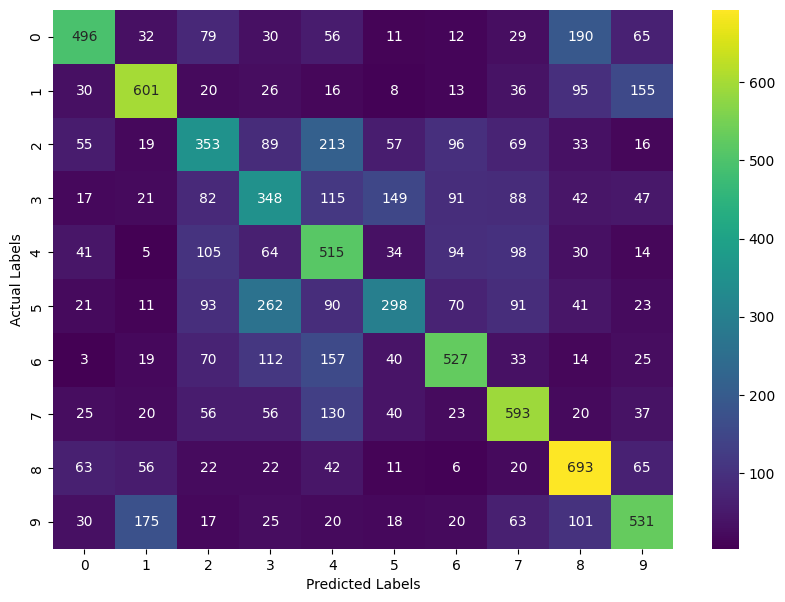

In [33]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cbar=True, cmap="viridis")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()